In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.9)  # Make sure everything is readable.
sns.set_style("whitegrid")

In [3]:
import os
print(os.getcwd())

print(os.getcwd())
[x for x in os.listdir(os.getcwd())]

/home/ml/lpagec/pytorch/GansFallingShort/synthetic_data_experiments/notebooks
/home/ml/lpagec/pytorch/GansFallingShort/synthetic_data_experiments/notebooks


['.ipynb_checkpoints', 'oracle_graphs.ipynb']

In [4]:
process = lambda path : pd.read_csv(path).drop_duplicates('Step')

csv_dir= '../../csv/oracle/'

gan_beta_cvo_oracle = process(csv_dir+'gan_beta_cvo_oracle.csv')
gan_beta_cvo_test   = process(csv_dir+'gan_beta_cvo_test.csv')

gan_beta_cvot_oracle = process(csv_dir+'gan_beta_cvot_oracle.csv')
gan_beta_cvot_test   = process(csv_dir+'gan_beta_cvot_test.csv')

gan_cvo_oracle = process(csv_dir+'gan_cvo_oracle.csv')
gan_cvo_test   = process(csv_dir+'gan_cvo_test.csv')

gan_cvot_oracle = process(csv_dir+'gan_cvot_oracle.csv')
gan_cvot_test   = process(csv_dir+'gan_cvot_test.csv')

gan_mle_oracle = process(csv_dir+'gan_mle_oracle.csv')
gan_mle_test   = process(csv_dir+'gan_mle_test.csv')

mle_cvo_oracle = process(csv_dir+'mle_cvo_oracle.csv')
mle_cvo_test   = process(csv_dir+'mle_cvo_test.csv')

mle_cvot_oracle = process(csv_dir+'mle_cvot_oracle.csv')
mle_cvot_test   = process(csv_dir+'mle_cvot_test.csv')

mle_cvt_oracle = process(csv_dir+'mle_cvt_oracle.csv')
mle_cvt_test   = process(csv_dir+'mle_cvt_test.csv')

cot_oracle = process(csv_dir+'cot_fixed_nll_oracle.csv')
cot_test   = process(csv_dir + 'cot_fixed_nll_test.csv')

leakgan_oracle = process(csv_dir+'leakgan_oracle.csv')
leakgan_test   = process(csv_dir+'leakgan_test.csv')

seqgan_oracle = process(csv_dir+'seqgan_oracle.csv')
seqgan_test   = process(csv_dir+'seqgan_test.csv')

nll_test       = process(csv_dir+'nll_test.csv')

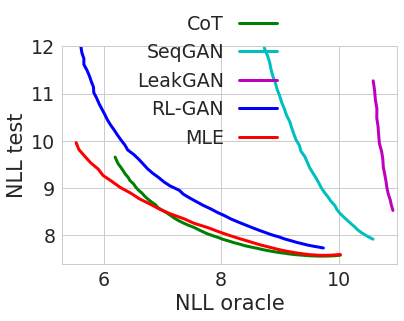

In [7]:
def get_size(pd_):
    size = [50] * len(pd_.Value)
    try:
        size[pd_[pd_.Step == 100].index[0]] = 200
    except:
        size[pd_[pd_.Step == 101].index[0]] = 200
    return size

def get_ec(c, pd_):
    ec  = [c] * len(pd_.Value)
    try:
        ec[pd_[pd_.Step == 100].index[0]] = 'k'
    except:
        ec[pd_[pd_.Step == 101].index[0]] = 'k'
    return ec

linewidth=3.0

plt.plot(cot_oracle.Value[23:], 
            cot_test.Value[23:], 
            c='g',
            label='CoT', 
            linewidth=linewidth)

plt.plot(seqgan_oracle.Value, 
            seqgan_test.Value, 
            c='c',
            label='SeqGAN',
            linewidth=linewidth)

plt.plot(leakgan_oracle.Value, 
            leakgan_test.Value, 
            c='m',
            label='LeakGAN',
            linewidth=linewidth)

plt.plot(gan_cvot_oracle.Value, 
            gan_cvot_test.Value, 
            c='b',
            label='RL-GAN',
            linewidth=linewidth)


plt.plot(mle_cvt_oracle.Value[::2], \
            mle_cvt_test.Value[::2], \
            c='r',
            label='MLE',
            linewidth=linewidth)

plt.ylim(7.4, 12)
plt.xlim(5.3, 11)


# plt.colorbar(sc)
plt.xlabel('NLL oracle')
plt.ylabel('NLL test')
# plt.axis([0, 0.6, 0, 1.1])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend(frameon=False, markerfirst=False, loc=(0.2, 0.5))
plt.savefig('figs/synthetic.pdf', bbox_inches='tight')
plt.show()
